In [60]:
# MO444-A 2s/2017 - Third assignment
#
#         Group 05
#
# - Anderson Rossanez (124136)
# - Bruno Branta Lopes (31470)
#

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime
from IPython.display import Markdown, display
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import pairwise_distances
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabaz_score
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import scale

def printm(msg):
    """Print in notebook using markups."""
    display(Markdown(msg))

def loadIDs():
    lines=[]
    with open('documents/ids', "r") as f:
        lines = f.read().splitlines()
    return np.asarray(lines)

def loadFeatures():
    features = pd.read_csv('documents/data.csv', sep=',', header=None)
    return features.values

def loadDocument(docID):
    data = None
    with open('documents/docs/' + docID, 'r') as docfile:
        data = docfile.read().replace('\n', '')
    return data

def computeKMeansMetrics(model, data):
    labels = model.fit_predict(data)
    cost = model.inertia_
    sil_avg = silhouette_score(data, labels)
    ch_score = calinski_harabaz_score(data, labels)
    return labels, cost, sil_avg, ch_score

In [3]:
ids = loadIDs()
print('IDs shape: {}'.format(ids.shape))

data = loadFeatures()
print('Data shape: {}'.format(data.shape))

IDs shape: (19924,)
Data shape: (19924, 2209)


In [4]:
# Let's look at the 5 first instances of the IDs
print(ids[0:5])

['832e15531654188fa0b951faa5f68540dfb1ca5a'
 'aa5163928a6edfd3bf69fd11fe763aacecf4602d'
 'e886703afff0c70d6598bcae0c2d69a5a237807f'
 'c1ea507b177b2e1673ce7a576057f91b75ae9d29'
 'bbf73405c85d22702fafc1c0916e8f713810ff8d']


In [5]:
# Now, let's have a look at the 5 first instances of the data (bag-of-words feature vectors)
data_frame = pd.DataFrame(data)
data_frame.head(5)

,0,1,2,3,4,5,6,7,8,9,...,2199,2200,2201,2202,2203,2204,2205,2206,2207,2208
0,0.077257,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.055755,0.0,0.0
2,0.042250,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.093693,0.0,0.099296,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.069105,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.036811,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.000000,0.041917,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [6]:
# Checking the value ranges
print('Min. value: {}'.format(np.min(data.flatten())))
print('Max. value: {}'.format(np.max(data.flatten())))

# Let's scale and normalize the data
data = scale(data)

normalizer = Normalizer()
normalizer = normalizer.fit(data)

data = normalizer.transform(data)

Min. value: 0.0
Max. value: 0.999901


In [38]:
# Attempting Mini-Batch K means with some different number of centroids.
kmeans, labels, costs, sil_avgs, ch_scores = [], [], [], [], []
num_centroids = [2, 4, 6, 8, 10, 15, 20, 25, 30, 35, 40, 45, 50, 60, 70, 80, 90, 100, 120, 140, 160, 180, 200]
for i in num_centroids:
    model = MiniBatchKMeans(n_clusters=i, init='k-means++', batch_size=1000, random_state=1)
    myLabels, cost, sil_avg, ch_score = computeKMeansMetrics(model, data)
    kmeans.append(model)
    labels.append(myLabels)
    costs.append(cost)
    sil_avgs.append(sil_avg)
    ch_scores.append(ch_score)
    print('%d clusters: Cost %5.2f; Silhouette avg %5.5f; Calinski-Harabasz Index: %5.2f' % (i, cost, sil_avg, ch_score))

2 clusters: Cost 19800.31 ; Silhouette avg 0.00620; CH Score 123.59
4 clusters: Cost 19700.97 ; Silhouette avg 0.00489; CH Score 75.24
6 clusters: Cost 19626.00 ; Silhouette avg 0.00487; CH Score 61.02
8 clusters: Cost 19512.65 ; Silhouette avg 0.00627; CH Score 60.47
10 clusters: Cost 19470.62 ; Silhouette avg 0.00697; CH Score 52.24
15 clusters: Cost 19298.33 ; Silhouette avg 0.00880; CH Score 47.28
20 clusters: Cost 19160.94 ; Silhouette avg 0.01065; CH Score 42.66
25 clusters: Cost 19009.95 ; Silhouette avg 0.01246; CH Score 40.45
30 clusters: Cost 18904.53 ; Silhouette avg 0.01470; CH Score 37.75
35 clusters: Cost 18842.39 ; Silhouette avg 0.01425; CH Score 34.22
40 clusters: Cost 18685.07 ; Silhouette avg 0.01643; CH Score 34.38
45 clusters: Cost 18640.97 ; Silhouette avg 0.01788; CH Score 31.79
50 clusters: Cost 18556.98 ; Silhouette avg 0.01755; CH Score 30.45
60 clusters: Cost 18427.54 ; Silhouette avg 0.01976; CH Score 27.91
70 clusters: Cost 18297.54 ; Silhouette avg 0.02169

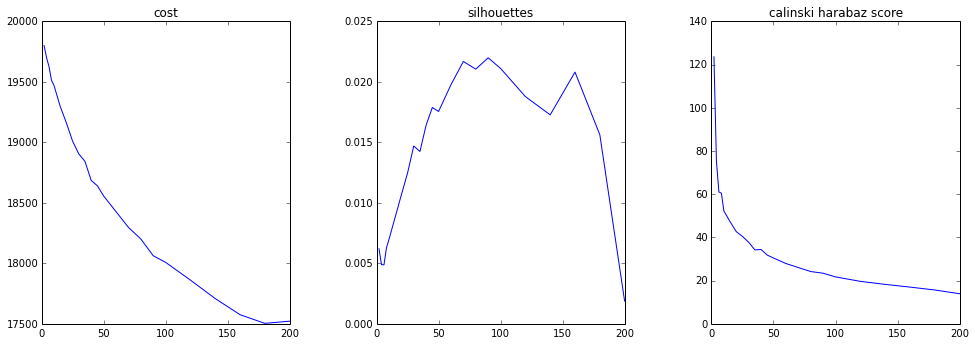

In [39]:
%matplotlib inline 

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex='col')

ax1.set_title('cost')
ax1.plot(num_centroids, costs)

ax2.set_title('silhouettes')
ax2.plot(num_centroids, sil_avgs)

ax3.set_title('calinski harabaz score')
ax3.plot(num_centroids, ch_scores)

f.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25, wspace=0.35)
f.set_size_inches(15, 5)
f.show()


In [55]:
# Chosen number of centroids
chosen_i = 14
chosen_model = kmeans[chosen_i]
chosen_model_labels = labels[chosen_i]
print('Chosen # of centroids: {}'.format(chosen_model.n_clusters))
print('Cost:                    %18.3f' % costs[chosen_i])
print('Silhouette avg:          %18.3f' % sil_avgs[chosen_i])
print('Calinski-Harabasz Index: %18.3f' % ch_scores[chosen_i])

Chosen # of centroids: 70
Cost:                             18297.541
Silhouette avg:                       0.022
Calinski-Harabasz Index:             26.047


In [65]:
##### Let's check three sample groups, their medoid documents, and two other closer documents.
for i in [26, 32, 58]:
    print('Group: %d' % i)
    center = chosen_model.cluster_centers_[i]
    group_points = data[chosen_model_labels == i]
    group_doc_ids = ids[chosen_model_labels == i]

    # Let's find the medoid and their closest points
    distancesMatrix = pairwise_distances(group_points, metric='euclidean')
    closest_to_medoid_indexes = np.argsort(distancesMatrix.sum(axis=0))
    medoid_index = closest_to_medoid_indexes[0]

    printm('# Medoid doc {}'.format(group_doc_ids[medoid_index]))
    print(loadDocument(group_doc_ids[medoid_index]))
    printm('## Closest to medoid doc: {}'.format(group_doc_ids[closest_to_medoid_indexes[1]]))
    print(loadDocument(group_doc_ids[closest_to_medoid_indexes[1]]))
    print(' ## Second closest to medoid doc: {}'.format(group_doc_ids[closest_to_medoid_indexes[2]]))
    print(loadDocument(group_doc_ids[closest_to_medoid_indexes[2]]))

Group: 26


# Medoid doc 2b75d2428e9dee17af550deee18a6b06ba56c860

Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.cmu.edu!fs7.ece.cmu.edu!europa.eng.gtefsd.com!howland.reston.ans.net!usenet.ins.cwru.edu!cleveland.Freenet.Edu!au021From: au021@cleveland.Freenet.Edu (Roland Behunin)Newsgroups: rec.sport.hockeySubject: Now if ESPN wanted to show a good game...Date: 22 Apr 1993 18:07:21 GMTOrganization: Case Western Reserve University, Cleveland, Ohio (USA)Lines: 9Message-ID: <1r6msp$b5e@usenet.INS.CWRU.Edu>NNTP-Posting-Host: hela.ins.cwru.eduThey could put on a Quebec-Montreal game.Talk a bout areivalry!opps rivalry..roland-- Roland


## Closest to medoid doc: e2905a7f2e199fbe7c95f15b9657f934ff9a999e

Xref: cantaloupe.srv.cs.cmu.edu alt.magick:9989 alt.pagan:29823 talk.religion.misc:84021Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.cmu.edu!bb3.andrew.cmu.edu!news.sei.cmu.edu!fs7.ece.cmu.edu!europa.eng.gtefsd.com!howland.reston.ans.net!usenet.ins.cwru.edu!cleveland.Freenet.Edu!ch981From: ch981@cleveland.Freenet.Edu (Tony Alicea)Newsgroups: alt.magick,alt.pagan,talk.religion.miscSubject: Re: Rosicrucian Order(s) ?!Date: 21 Apr 1993 17:43:19 GMTOrganization: Case Western Reserve University, Cleveland, OH (USA)Lines: 13Message-ID: <1r413n$plr@usenet.INS.CWRU.Edu>References: <alamutC5p1I3.In4@netcom.com> <N2382B6w165w@tweekco.uucp> <C5r5zz.Jnz@rahul.net> <1qvibv$b75@usenet.INS.CWRU.Edu> <sandvik-190493193847@sandvik-kent.apple.com> <1r0pb6$bes@usenet.INS.CWRU.Edu> <sandvik-200493235951@sandvik-kent.apple.com>Reply-To: ch981@cleveland.Freenet.Edu (Tony Alicea)NNTP-Posting-Host: hela.ins.cwru.eduIn a previous article, sandvik@newton.apple.com (Kent Sandvik) says:>Well, it depends how y

# Medoid doc aad5914b9868c167169550405fdcd99f786035ed

Newsgroups: talk.politics.gunsPath: cantaloupe.srv.cs.cmu.edu!magnesium.club.cc.cmu.edu!news.sei.cmu.edu!fs7.ece.cmu.edu!europa.eng.gtefsd.com!howland.reston.ans.net!usc!cs.utexas.edu!convex!convex!bjonesFrom: bjones@convex.com (Brad Jones)Subject: Re: Letter to the PresidentSender: usenet@news.eng.convex.com (news access account)Message-ID: <bjones.735320585@neptune>Date: Tue, 20 Apr 1993 15:43:05 GMTReferences: <1993Apr20.140647.6274@icd.ab.com>Nntp-Posting-Host: neptune.convex.comOrganization: Engineering, CONVEX Computer Corp., Richardson, Tx., USAX-Disclaimer: This message was written by a user at CONVEX Computer              Corp. The opinions expressed are those of the user and              not necessarily those of CONVEX.Lines: 8kdw@icd.ab.com (Kenneth D. Whitehead) writes:>the dismissal or resignation of Lloyd Bensen, Secretary of the Treasury,In case you haven't sent it yet, it's "Bentsen", not "Bensen".Brad


## Closest to medoid doc: f56bf5f1d648a27681d108e955b87b67436a6788

Newsgroups: sci.spacePath: cantaloupe.srv.cs.cmu.edu!das-news.harvard.edu!noc.near.net!howland.reston.ans.net!zaphod.mps.ohio-state.edu!cs.utexas.edu!convex!schumachFrom: schumach@convex.com (Richard A. Schumacher)Subject: Re: Gamma Ray Bursters. WHere are they.Message-ID: <schumach.736269361@convex.convex.com>Sender: usenet@convex.com (news access account)Nntp-Posting-Host: starman.convex.comOrganization: CONVEX Computer Corporation, Richardson, Tx., USAReferences: <1radsr$att@access.digex.net> <STEINLY.93Apr25180118@topaz.ucsc.edu> <29601@galaxy.ucr.edu> <1rlrpv$5ta@access.digex.net> <1993Apr30.144341.11546@sed.stel.com>Date: Sat, 1 May 1993 15:16:01 GMTX-Disclaimer: This message was written by a user at CONVEX Computer              Corp. The opinions expressed are those of the user and              not necessarily those of CONVEX.Lines: 3You should have been following the discussion of GRBsgoing on in sci.astro. It's been discussed in some detail,with references even.
 ## Second clo

# Medoid doc 088950cb5a5d633c4dd322e8cce1f2cb0d6cb440

Xref: cantaloupe.srv.cs.cmu.edu soc.culture.arabic:18385 talk.politics.mideast:75907Path: cantaloupe.srv.cs.cmu.edu!rochester!udel!gatech!howland.reston.ans.net!zaphod.mps.ohio-state.edu!malgudi.oar.net!news.ysu.edu!psuvm!frmop11.cnusc.fr!barilvm!vms.huji.ac.il!wisipc.weizmann.ac.il!wiscon.weizmann.ac.il!jhsegalNewsgroups: soc.culture.arabic,talk.politics.mideastSubject: Re: How many israeli soldiers does it take to kill a 5 yr old child?Message-ID: <1993Apr15.170221.18542@wisipc.weizmann.ac.il>From: jhsegal@wiscon.weizmann.ac.il (Livian Segal)Date: Thu, 15 Apr 1993 17:02:21 GMTSender: news@wisipc.weizmann.ac.ilReferences: <1qcaqd$a5b@news.ysu.edu> <1qch0h$ijj@hal.gnu.ai.mit.edu> <1qhv50$222@bagel.cs.huji.ac.il>Organization: Weizmann Institute of Science, Computation CenterLines: 16In article <1qhv50$222@bagel.cs.huji.ac.il> ranen@falafel.cs.huji.ac.il (Ranen Goren) writes:>Q: How many Nick Steel's does it take to twist any truth around?>A: Only one, and thank God there's only one.>>	R

## Closest to medoid doc: 005ecd5d4225fc9d2f36d72109c183d07dadd060

Xref: cantaloupe.srv.cs.cmu.edu soc.culture.arabic:18702 talk.politics.mideast:76218 soc.culture.jewish:63561Path: cantaloupe.srv.cs.cmu.edu!magnesium.club.cc.cmu.edu!news.sei.cmu.edu!cis.ohio-state.edu!zaphod.mps.ohio-state.edu!howland.reston.ans.net!newsserver.jvnc.net!gmd.de!dearn!barilvm!vms.huji.ac.il!bagel.cs.huji.ac.il!nntpserver!amossNewsgroups: soc.culture.arabic,talk.politics.mideast,soc.culture.jewishSubject: Re: Israeli TerrorismMessage-ID: <AMOSS.93Apr25163327@shuldig.cs.huji.ac.il>From: amoss@shuldig.cs.huji.ac.il (Amos Shapira)Date: 25 Apr 93 16:33:27References: <1rbhf8$b4p@usenet.INS.CWRU.Edu> <1993Apr24.203620.6531@Virginia.EDU><2BD9C01D.11546@news.service.uci.edu> <1rd7eo$1a4@usenet.INS.CWRU.Edu>Organization: Inst. of Comp. Sci., Hebrew University, Jerusalem, IsraelNNTP-Posting-Host: shuldig.cs.huji.ac.ilIn-reply-to: cy779@cleveland.Freenet.Edu's message of 25 Apr 1993 05:26:48 GMTLines: 14cy779@cleveland.Freenet.Edu (Anas Omran) writes:                               